In [151]:
import xarray as xr
import pandas as pd
import rioxarray as riox
import geopandas as gpd
import contextily as cx

In [127]:
dem = riox.open_rasterio("data/nasadem_sd.tiff").sel(
    band=1
)
dem

<xarray.DataArray (y: 3515, x: 5510)>
[19367650 values with dtype=int16]
Coordinates:
    band         int64 1
  * x            (x) float64 -117.6 -117.6 -117.6 ... -116.1 -116.1 -116.1
  * y            (y) float64 33.51 33.5 33.5 33.5 ... 32.53 32.53 32.53 32.53
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -32768
    scale_factor:   1.0
    add_offset:     0.0

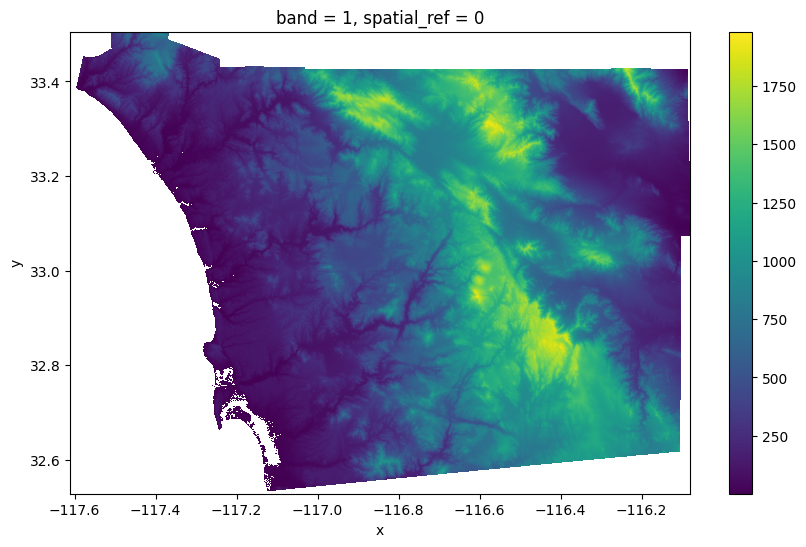

In [128]:
dem.where(dem > 0).plot.imshow(figsize=(10, 6))

In [136]:
# sandeogo neighbourhoods
sand_area = gpd.read_file('data/sandiego_tracts.gpkg')
sand_area.head()

,GEOID,median_age,total_pop,total_pop_white,tt_work,hh_total,hh_female,total_bachelor,median_hh_income,income_gini,...,state,county,tract,area_sqm,pct_rented,pct_hh_female,pct_bachelor,pct_white,sub_30,geometry
0,06073018300,37.1,2590.0,2375.0,1299.0,2590.0,137.0,0.0,62500.0,0.5355,...,06,073,018300,2.876449,0.373913,0.052896,0.000000,0.916988,False,"POLYGON ((-13069450.120 3922380.770, -13069175..."
1,06073018601,41.2,5147.0,4069.0,1970.0,5147.0,562.0,24.0,88165.0,0.4265,...,06,073,018601,4.548797,0.205144,0.109190,0.004663,0.790558,False,"POLYGON ((-13067719.770 3922939.420, -13067631..."
2,06073017601,54.4,5595.0,4925.0,1702.0,5595.0,442.0,34.0,110804.0,0.4985,...,06,073,017601,8.726275,0.279029,0.078999,0.006077,0.880250,False,"POLYGON ((-13058166.110 3907247.690, -13058140..."
3,06073019301,42.3,7026.0,5625.0,3390.0,7026.0,638.0,46.0,100539.0,0.4003,...,06,073,019301,3.519743,0.196512,0.090806,0.006547,0.800598,False,"POLYGON ((-13056896.290 3925255.610, -13056868..."
4,06073018700,21.8,40402.0,30455.0,24143.0,40402.0,2456.0,23.0,41709.0,0.3196,...,06,073,018700,559.150793,0.949887,0.060789,0.000569,0.753799,False,"POLYGON ((-13090788.510 3946435.430, -13090736..."


<Axes: >

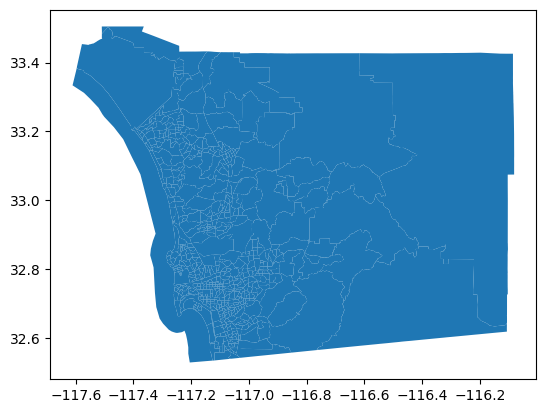

In [160]:
sand_area.to_crs('EPSG:4326').plot()

In [131]:
# computing zonal statistics,
# zonal here cane be any geometry like a polygon

largest_tract0 = sand_area.query(f'area_sqm == {sand_area.area_sqm.max()} ')
largest_tract0

,GEOID,median_age,total_pop,total_pop_white,tt_work,hh_total,hh_female,total_bachelor,median_hh_income,income_gini,...,state,county,tract,area_sqm,pct_rented,pct_hh_female,pct_bachelor,pct_white,sub_30,geometry
627,06073021000,60.6,2693.0,2268.0,693.0,2693.0,422.0,35.0,39760.0,0.4416,...,06,073,021000,2759.220497,0.095565,0.156703,0.012997,0.842183,False,"POLYGON ((-12981895.900 3945471.980, -12981872..."


In [24]:
largest_tract0.index[0]

627

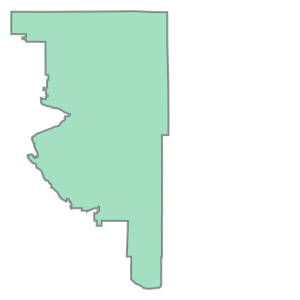

In [138]:
largest_tract = largest_tract0.loc[largest_tract0.index[0], "geometry"]
largest_tract

In [139]:
# Clip the elevation for the largest tract from dem dataset

dem_clip = dem.rio.clip([largest_tract.__geo_interface__], crs=sand_area.crs)

In [ ]:
# dem1 = dem.rio.write_crs(sand_area.crs)

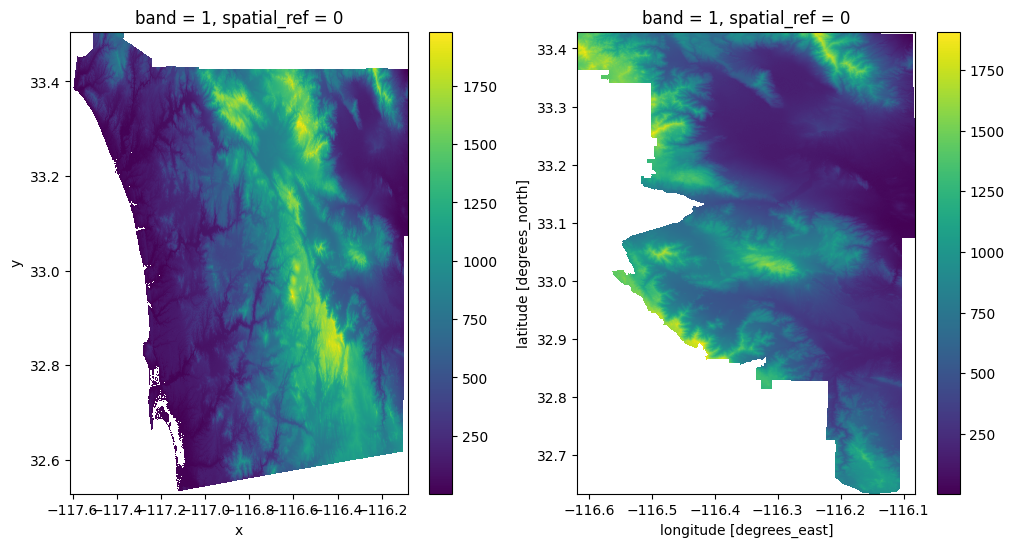

In [140]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
dem.where(dem > 0).plot.imshow(ax=axs[0])


dem_clip.where(dem_clip > 0).plot.imshow(ax=axs[1])

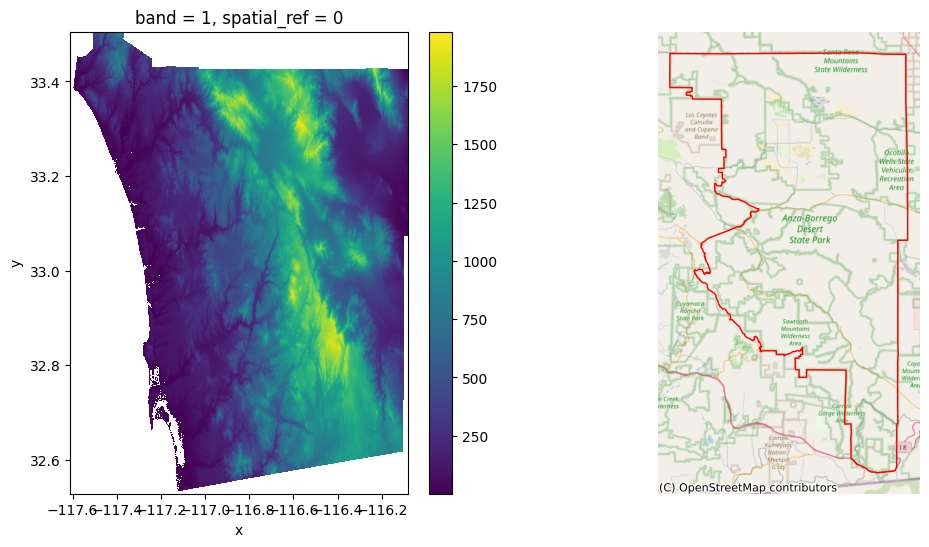

In [177]:
import matplotlib.pyplot as plt
from shapely.geometry import mapping
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
dem0 = dem.where(dem > 0)


dem.where(dem > 0).plot.imshow(ax=axs[0],)


largest_tract0.plot(
    ax=axs[1], edgecolor="red", facecolor="none")
axs[1].set_axis_off()
cx.add_basemap(
    axs[1], crs=largest_tract0.crs,  source=cx.providers.OpenStreetMap.Mapnik,
)